In [17]:
import scipy.io as sio
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from keras import regularizers

In [41]:
#loading data
DDataFile = './data/D_VLOS_channelVector_B32_U50000.mat'
DData = sio.loadmat(DDataFile)

LocationDataFile = './data/randLocationU50000VIP.mat'
locationData = sio.loadmat(LocationDataFile)


In [42]:
#preprocessing the data
D_data = DData['D']
location_data = np.transpose(locationData['location'])
location_data = location_data[:,:2]

D_data = np.transpose(np.concatenate((np.real(D_data),np.imag(D_data))))

print(D_data.shape,location_data.shape)
total, l = D_data.shape
total, d = location_data.shape

train_length = int(np.floor(total * 0.8))

impulses_train = D_data[:train_length, :]
location_train = location_data[:train_length,:]
print(total,train_length, impulses_train.shape, location_train.shape)

impulses_test = D_data[train_length:, :]
location_test = location_data[train_length:,:]

(50000, 64) (50000, 2)
50000 40000 (40000, 64) (40000, 2)


- Try the row data of 32*2k -> (3,291) mean = 63
- Try the row data of 32*20k ->(0.27,147) mean = 26.5 (128,1024*3)
- Try three layers with row data -> (0.5-187) mean = 29
 


In [43]:
#Build the model
model = keras.Sequential()
#keras.layers.normalization.BatchNormalization()
model.add(Dense(128, activation = 'relu', 
                #kernel_regularizer=regularizers.l2(0.01),
                #activity_regularizer=regularizers.l1(0.01)
               ))  #the hidden layer
#keras.layers.normalization.BatchNormalization()
model.add(Dense(1024, activation = 'relu'))   #the hidden layer number 

model.add(Dense(1024, activation = 'relu')) 

model.add(Dense(1024, activation = 'relu')) 

model.add(Dense(d, activation = 'linear'))  # None is different from 'linear'      ### the output layer

In [44]:
#Compilation
loss_func = 'mean_squared_error'   #   categorical_crossentropy(bad)   mean_squared_error
opt_func = keras.optimizers.Adam(lr=0.0001) #'Adam'  lr=0.001  #  RMSprop(overfiiting) sgd(overfitting)  Adadelta(overfitting)   Adam

model.compile(loss = loss_func, 
              optimizer = opt_func
             )

In [45]:
#Train the model, iterating
early_stop = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1)
history = model.fit(impulses_train, location_train,
                    batch_size = 50, # 10,20
                    epochs = 200,
                    verbose = 2,
                    validation_split = 0.1 #0.2
                    #validation_data=(impulses_test, location_test)
                   )


Train on 36000 samples, validate on 4000 samples
Epoch 1/200
 - 51s - loss: 56072.8185 - val_loss: 34044.2314
Epoch 2/200
 - 52s - loss: 18496.3291 - val_loss: 6987.9614
Epoch 3/200
 - 52s - loss: 4704.2276 - val_loss: 3198.5190
Epoch 4/200
 - 52s - loss: 2554.9701 - val_loss: 2126.5538
Epoch 5/200
 - 51s - loss: 1808.6645 - val_loss: 1684.3261
Epoch 6/200
 - 53s - loss: 1442.3997 - val_loss: 1360.0670
Epoch 7/200
 - 52s - loss: 1195.8317 - val_loss: 1209.0398
Epoch 8/200
 - 52s - loss: 1029.0493 - val_loss: 1112.0435
Epoch 9/200
 - 52s - loss: 903.6653 - val_loss: 951.5596
Epoch 10/200
 - 53s - loss: 813.6327 - val_loss: 870.9063
Epoch 11/200
 - 52s - loss: 735.3350 - val_loss: 827.4907
Epoch 12/200
 - 52s - loss: 678.3307 - val_loss: 759.5088
Epoch 13/200
 - 52s - loss: 626.4901 - val_loss: 733.8449
Epoch 14/200
 - 52s - loss: 588.7225 - val_loss: 697.0357
Epoch 15/200
 - 49s - loss: 550.7761 - val_loss: 667.8218
Epoch 16/200
 - 48s - loss: 525.6580 - val_loss: 654.8213
Epoch 17/200


 - 48s - loss: 53.7312 - val_loss: 548.4531
Epoch 142/200
 - 48s - loss: 52.6832 - val_loss: 564.2250
Epoch 143/200
 - 48s - loss: 51.8376 - val_loss: 554.0098
Epoch 144/200
 - 48s - loss: 50.5181 - val_loss: 548.9986
Epoch 145/200
 - 48s - loss: 50.0086 - val_loss: 558.8758
Epoch 146/200
 - 48s - loss: 52.6796 - val_loss: 553.1911
Epoch 147/200
 - 48s - loss: 51.8013 - val_loss: 565.8534
Epoch 148/200
 - 50s - loss: 49.4006 - val_loss: 549.7633
Epoch 149/200
 - 49s - loss: 46.4020 - val_loss: 551.8300
Epoch 150/200
 - 48s - loss: 49.0272 - val_loss: 562.1714
Epoch 151/200
 - 48s - loss: 49.1825 - val_loss: 550.3146
Epoch 152/200
 - 48s - loss: 47.5787 - val_loss: 553.4345
Epoch 153/200
 - 49s - loss: 45.1445 - val_loss: 554.7378
Epoch 154/200
 - 48s - loss: 45.6907 - val_loss: 555.8528
Epoch 155/200
 - 48s - loss: 48.6528 - val_loss: 555.6153
Epoch 156/200
 - 48s - loss: 42.1546 - val_loss: 557.3492
Epoch 157/200
 - 48s - loss: 45.8004 - val_loss: 549.9946
Epoch 158/200
 - 48s - loss:

In [50]:
#make prediction
loc_prediction = model.predict(impulses_test)
print(loc_prediction.shape)
print(location_test.shape)

(10000, 2)
(10000, 2)


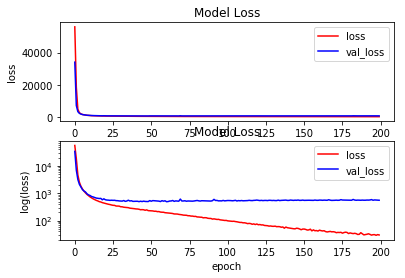

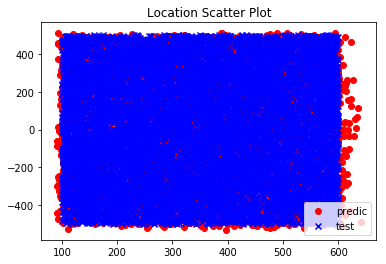

In [51]:
#plot the loss data
import math
plt.subplot(211)
plt.plot(history.history['loss'],'r',label = 'loss')
plt.plot(history.history['val_loss'],'b', label = 'val_loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(212)
plt.semilogy(history.history['loss'],'r',label = 'loss')
plt.semilogy(history.history['val_loss'],'b', label = 'val_loss')
plt.title('Model Loss')
plt.ylabel('log(loss)')
plt.xlabel('epoch')
plt.legend()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Location Scatter Plot')
ax1.scatter(loc_prediction[:,0],loc_prediction[:,1],c = 'r',marker = 'o', label = 'predic')
ax1.scatter(location_test[:,0],location_test[:,1],c = 'b',marker = 'x', label = 'test')
plt.legend()
plt.show()

In [48]:
#The training result
loss = model.evaluate(impulses_test, location_test, verbose=1)
print ('Test loss & mean_absolute_error: ', loss)

10000/10000 [==============================] - 3s 256us/step
Test loss & mean_absolute_error:  578.2680855957032


error distance is  25.25246712678902
max error distance is  199.19924172086695
min error distance is  0.06009465869946803


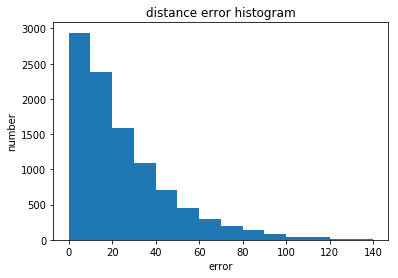

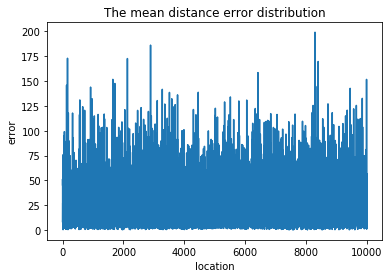

(10000, 1)

In [53]:
#calculate the mean of error distance
err = loc_prediction - location_test
x = err[:,:1]
y = err[:,1:]

err_dis = np.sqrt(np.square(x)+np.square(y))
err_min = np.min(err_dis)
err_max = np.max(err_dis)
err_avg = np.mean(err_dis)
print("error distance is ", err_avg)
print("max error distance is ", err_max)
print("min error distance is ", err_min)
#set the value of x, y, z
x,y,z = location_test[:,:1],location_test[:,1:2],err_dis

#plot the 2D image of error
plt.figure(1)
#plt.subplot(2,1,2)
plt.hist(err_dis, bins =  range(0,150,10)) 
plt.xlabel("error")
plt.ylabel("number")
plt.title("distance error histogram") 

plt.figure(2)
#plt.subplot(2,1,1)
plt.plot(err_dis)
plt.title("The mean distance error distribution")
plt.xlabel("location")
plt.ylabel("error")
plt.show()
x.shape

Text(0.5, 0.92, 'The mean distance error of 3D Iamge')

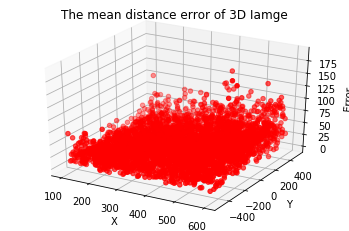

In [38]:
#plot 3D image
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,c='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Error")
plt.title("The mean distance error of 3D Iamge")

Text(0.5, 1.0, "The mean distance error of 'heat map'")

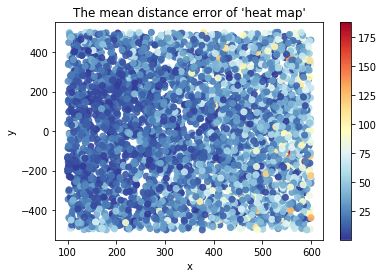

In [39]:
#draw the "heatmap" of error
fig = plt.figure()
ax3 = fig.add_subplot(111)
cm = plt.cm.get_cmap('RdYlBu_r') #Accent  RdYlBu_r RdYlBu  Blues_r  Greens  YlOrBr_r

sc = ax3.scatter(x,y,c = z, marker = 'o', label = 'test',alpha=0.9, cmap=cm)
plt.colorbar(sc)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
plt.title("The mean distance error of 'heat map'")